In [0]:
import pandas as pd
import numpy as np
import json
from google.colab import drive

In [5]:
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
data=[]
with open("gdrive/My Drive/Face_Dataset/face_annotations-kaustubh.json", "r") as read_file:
    data = json.load(read_file)

In [0]:
X = []

imgd = data['_via_img_metadata']#'img_001.jpg48539']['regions']

for _, imgval in imgd.items():
    for rgnd in imgval['regions']:
        shape = rgnd['shape_attributes']
        X.append([shape['width'], shape['height']])

X = np.reshape(X, (-1, 2))
X = X/400
lX = np.log(X)

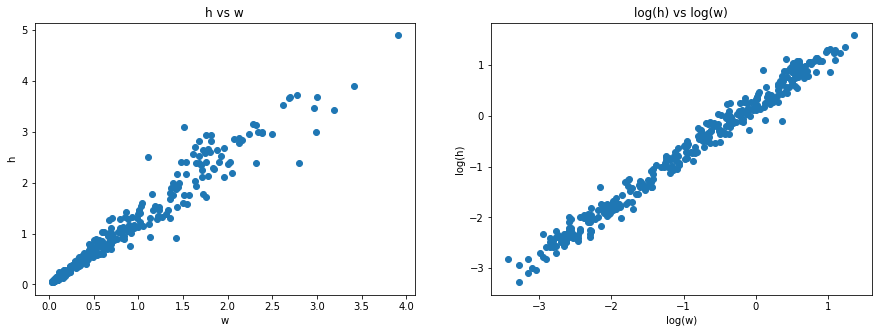

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,2,figsize=(15,5))

axs[0].plot(X[:, 0], X[:, 1], 'o')
axs[0].set_title('h vs w')
axs[0].set_ylabel('h')
axs[0].set_xlabel('w')

axs[1].plot(lX[:, 0], lX[:, 1], 'o')
axs[1].set_title('log(h) vs log(w)')
axs[1].set_ylabel('log(h)')
axs[1].set_xlabel('log(w)')
plt.show()

In [0]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, init="k-means++", n_init=10, max_iter=300, tol=0.0001).fit(X)
lkmeans = KMeans(n_clusters=4, init="k-means++", n_init=10, max_iter=300, tol=0.0001).fit(lX)

y_pred, ly_pred = kmeans.predict(X), lkmeans.predict(lX)

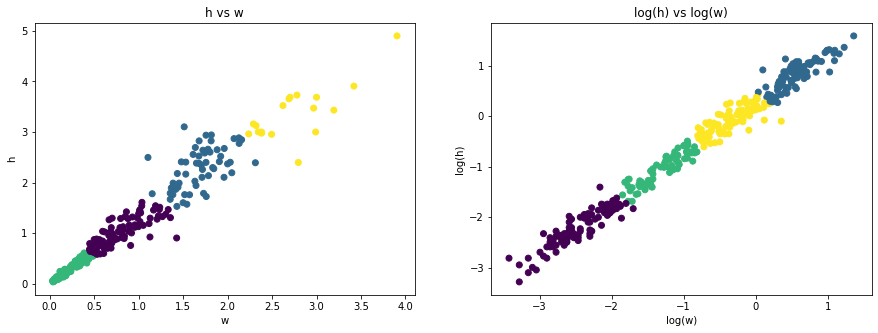

In [12]:
fig, axs = plt.subplots(1,2,figsize=(15,5))

axs[0].scatter(X[:, 0], X[:, 1], c=y_pred)
axs[0].set_title('h vs w')
axs[0].set_ylabel('h')
axs[0].set_xlabel('w')

axs[1].scatter(lX[:, 0], lX[:, 1], c=ly_pred)
axs[1].set_title('log(h) vs log(w)')
axs[1].set_ylabel('log(h)')
axs[1].set_xlabel('log(w)')
plt.show()

In [13]:
kmeans.cluster_centers_*400

array([[ 311.35      ,  398.06      ],
       [ 675.10344828,  913.81034483],
       [  69.2       ,   88.63333333],
       [1100.44444444, 1346.22222222]])

In [14]:
bb = np.exp(lkmeans.cluster_centers_)*400
print(bb)

[[ 35.23374477  44.61891246]
 [713.71646691 926.50905428]
 [109.587563   140.9979365 ]
 [277.46129477 362.42652974]]
